In [1]:
import numpy as np
import pandas as pd
import pylab as plt
from scipy.optimize import curve_fit
import seaborn as sns
## Importo las funciones de accuracy y testeo de modelos:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split
## Importo los modelos que voy a usar/probar:
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
## Librerías de optimización de modelos:
from sklearn.model_selection import RandomizedSearchCV


# Defino mi matriz de confusión: 

def confusion(ytest,y_pred):
    names=["0","1"]
    cm=confusion_matrix(ytest,y_pred,normalize='true')
    f,ax=plt.subplots(figsize=(5,5))
    sns.heatmap(cm,annot=True,linewidth=.5,linecolor="r",ax=ax) #fmt=".0f",
    plt.xlabel("y_pred")
    plt.ylabel("y_true")
    ax.set_xticklabels(names)
    ax.set_yticklabels(names)
    plt.show()

    return

In [2]:
# Con estas líneas le doy formato a los gráficos
sns.set_style("darkgrid")
plt.rc('font', size=10)
plt.rc('axes', titlesize=16)
plt.rc('figure', titlesize=16)
plt.rc('axes', labelsize=14) 
plt.rc('xtick', labelsize=12) 
plt.rc('ytick', labelsize=12) 

In [93]:
dataset = pd.read_csv('owid-covid-data.csv')

In [94]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 171345 entries, 0 to 171344
Data columns (total 67 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   iso_code                                    171345 non-null  object 
 1   continent                                   161116 non-null  object 
 2   location                                    171345 non-null  object 
 3   date                                        171345 non-null  object 
 4   total_cases                                 168081 non-null  float64
 5   new_cases                                   167895 non-null  float64
 6   new_cases_smoothed                          165890 non-null  float64
 7   total_deaths                                150065 non-null  float64
 8   new_deaths                                  150077 non-null  float64
 9   new_deaths_smoothed                         147937 non-null  float64
 

In [95]:
dataset.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-02-24,5.0,5.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-02-25,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-02-26,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-02-27,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-02-28,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN


In [97]:
dataset['date']= pd.to_datetime(dataset['date'])

In [98]:
arg = dataset[dataset.location == 'Argentina']
arg.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
6022,ARG,South America,Argentina,2020-01-01,NaN,NaN,NaN,NaN,NaN,NaN,...,16.2,27.7,NaN,5.0,76.67,0.845,NaN,NaN,NaN,NaN
6023,ARG,South America,Argentina,2020-01-02,NaN,NaN,NaN,NaN,NaN,NaN,...,16.2,27.7,NaN,5.0,76.67,0.845,NaN,NaN,NaN,NaN
6024,ARG,South America,Argentina,2020-01-03,NaN,NaN,NaN,NaN,NaN,NaN,...,16.2,27.7,NaN,5.0,76.67,0.845,NaN,NaN,NaN,NaN
6025,ARG,South America,Argentina,2020-01-04,NaN,NaN,NaN,NaN,NaN,NaN,...,16.2,27.7,NaN,5.0,76.67,0.845,NaN,NaN,NaN,NaN
6026,ARG,South America,Argentina,2020-01-05,NaN,NaN,NaN,NaN,NaN,NaN,...,16.2,27.7,NaN,5.0,76.67,0.845,NaN,NaN,NaN,NaN


In [99]:
arg.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 816 entries, 6022 to 6837
Data columns (total 67 columns):
 #   Column                                      Non-Null Count  Dtype         
---  ------                                      --------------  -----         
 0   iso_code                                    816 non-null    object        
 1   continent                                   816 non-null    object        
 2   location                                    816 non-null    object        
 3   date                                        816 non-null    datetime64[ns]
 4   total_cases                                 754 non-null    float64       
 5   new_cases                                   754 non-null    float64       
 6   new_cases_smoothed                          748 non-null    float64       
 7   total_deaths                                749 non-null    float64       
 8   new_deaths                                  749 non-null    float64       
 9   new_de

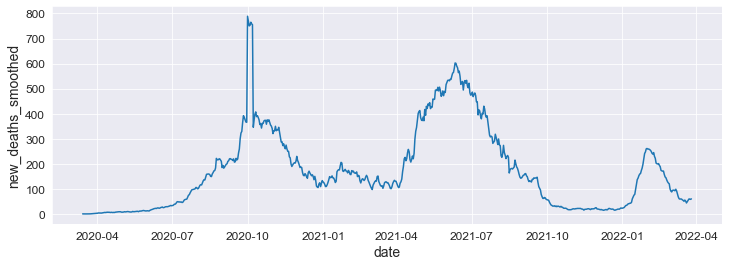

In [100]:
plt.figure(figsize=(12,4))
# sns.lineplot(data = arg, x = 'date', y = 'new_cases_smoothed')
sns.lineplot(data = arg, x = 'date', y = 'new_deaths_smoothed')
plt.show()

In [101]:
arg

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
6022,ARG,South America,Argentina,2020-01-01,NaN,NaN,NaN,NaN,NaN,NaN,...,16.2,27.7,NaN,5.0,76.67,0.845,NaN,NaN,NaN,NaN
6023,ARG,South America,Argentina,2020-01-02,NaN,NaN,NaN,NaN,NaN,NaN,...,16.2,27.7,NaN,5.0,76.67,0.845,NaN,NaN,NaN,NaN
6024,ARG,South America,Argentina,2020-01-03,NaN,NaN,NaN,NaN,NaN,NaN,...,16.2,27.7,NaN,5.0,76.67,0.845,NaN,NaN,NaN,NaN
6025,ARG,South America,Argentina,2020-01-04,NaN,NaN,NaN,NaN,NaN,NaN,...,16.2,27.7,NaN,5.0,76.67,0.845,NaN,NaN,NaN,NaN
6026,ARG,South America,Argentina,2020-01-05,NaN,NaN,NaN,NaN,NaN,NaN,...,16.2,27.7,NaN,5.0,76.67,0.845,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6833,ARG,South America,Argentina,2022-03-22,9016057.0,4690.0,4986.000,127675.0,76.0,54.286,...,16.2,27.7,NaN,5.0,76.67,0.845,NaN,NaN,NaN,NaN
6834,ARG,South America,Argentina,2022-03-23,9019660.0,3603.0,4832.000,127752.0,77.0,59.714,...,16.2,27.7,NaN,5.0,76.67,0.845,NaN,NaN,NaN,NaN
6835,ARG,South America,Argentina,2022-03-24,9021240.0,1580.0,4403.857,127780.0,28.0,59.571,...,16.2,27.7,NaN,5.0,76.67,0.845,NaN,NaN,NaN,NaN
6836,ARG,South America,Argentina,2022-03-25,9023812.0,2572.0,2711.857,127846.0,66.0,58.143,...,16.2,27.7,NaN,5.0,76.67,0.845,NaN,NaN,NaN,NaN


In [102]:
darg = arg.dropna(subset=['new_cases_smoothed', 'new_deaths_smoothed'])
darg

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
6095,ARG,South America,Argentina,2020-03-14,34.0,3.0,3.714,2.0,0.0,0.286,...,16.2,27.7,NaN,5.0,76.67,0.845,NaN,NaN,NaN,NaN
6096,ARG,South America,Argentina,2020-03-15,45.0,11.0,4.714,2.0,0.0,0.143,...,16.2,27.7,NaN,5.0,76.67,0.845,NaN,NaN,NaN,NaN
6097,ARG,South America,Argentina,2020-03-16,56.0,11.0,6.286,2.0,0.0,0.143,...,16.2,27.7,NaN,5.0,76.67,0.845,NaN,NaN,NaN,NaN
6098,ARG,South America,Argentina,2020-03-17,68.0,12.0,7.286,2.0,0.0,0.143,...,16.2,27.7,NaN,5.0,76.67,0.845,NaN,NaN,NaN,NaN
6099,ARG,South America,Argentina,2020-03-18,79.0,11.0,8.571,2.0,0.0,0.143,...,16.2,27.7,NaN,5.0,76.67,0.845,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6833,ARG,South America,Argentina,2022-03-22,9016057.0,4690.0,4986.000,127675.0,76.0,54.286,...,16.2,27.7,NaN,5.0,76.67,0.845,NaN,NaN,NaN,NaN
6834,ARG,South America,Argentina,2022-03-23,9019660.0,3603.0,4832.000,127752.0,77.0,59.714,...,16.2,27.7,NaN,5.0,76.67,0.845,NaN,NaN,NaN,NaN
6835,ARG,South America,Argentina,2022-03-24,9021240.0,1580.0,4403.857,127780.0,28.0,59.571,...,16.2,27.7,NaN,5.0,76.67,0.845,NaN,NaN,NaN,NaN
6836,ARG,South America,Argentina,2022-03-25,9023812.0,2572.0,2711.857,127846.0,66.0,58.143,...,16.2,27.7,NaN,5.0,76.67,0.845,NaN,NaN,NaN,NaN


In [103]:
df_arg = darg.melt(id_vars=['date'], var_name='variable', value_name='valor')
df_arg

,date,variable,valor
0,2020-03-14,iso_code,ARG
1,2020-03-15,iso_code,ARG
2,2020-03-16,iso_code,ARG
3,2020-03-17,iso_code,ARG
4,2020-03-18,iso_code,ARG
...,...,...,...
49033,2022-03-22,excess_mortality_cumulative_per_million,NaN
49034,2022-03-23,excess_mortality_cumulative_per_million,NaN
49035,2022-03-24,excess_mortality_cumulative_per_million,NaN
49036,2022-03-25,excess_mortality_cumulative_per_million,NaN


6


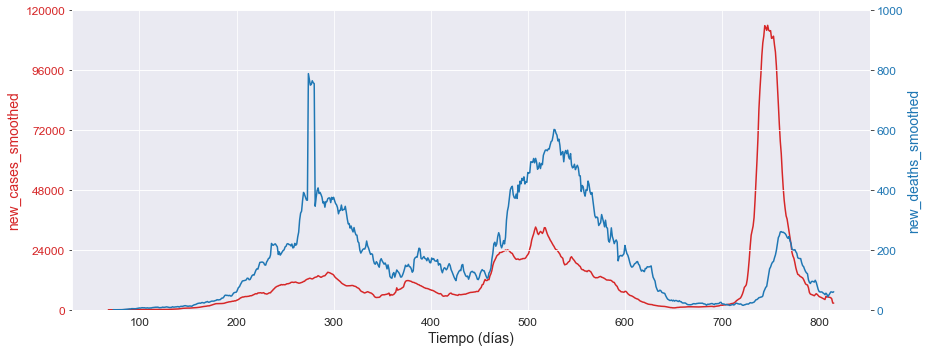

In [107]:
from matplotlib.ticker import MaxNLocator
from matplotlib.ticker import LinearLocator

t = np.arange(0,len(arg.date))
data1 = arg.new_cases_smoothed
data2 = arg.new_deaths_smoothed

fig, ax1 = plt.subplots(figsize=(13,5))

color = 'tab:red'
ax1.set_xlabel('Tiempo (días)')
ax1.set_ylabel('new_cases_smoothed', color=color)
ax1.plot(t, data1, color=color)
ax1.tick_params(axis='y', labelcolor=color)
ax1.set_ylim([0,120000])
# ax1.yaxis.set_major_locator(MaxNLocator(5)) 
N = len(ax1.get_yticks())-2
N = 6
print(N)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('new_deaths_smoothed', color=color)  # we already handled the x-label with ax1
ax2.plot(t, data2, color=color)
ax2.tick_params(axis='y', labelcolor=color)
ax2.set_ylim([0,1000])
# ax2.yaxis.set_major_locator(MaxNLocator(5)) 


# ax2.yaxis.set_major_locator(LinearLocator(N))

ax1.yaxis.set_major_locator(LinearLocator(N))
ax2.yaxis.set_major_locator(LinearLocator(N))

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()